In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import save_model
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import load_model

2024-09-05 19:51:09.859494: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-05 19:51:09.864932: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-05 19:51:10.176879: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-05 19:51:10.236389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-05 19:51:10.405503: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
# Set the path to the folder containing the images
data_folder = "./archive"

# Define the class labels and corresponding folder names
class_labels = ["Aadhaar", "PAN", "Driving Licence", "Voter ID", "Passport", "Utility"]

In [3]:
def preprocess_images(folder_path):
    images = []
    labels = []
    for i, label in enumerate(class_labels):
        folder = os.path.join(folder_path, label)
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None and img.size != 0:  # Check for valid image size
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                images.append(img)
                labels.append(i)

    return np.array(images), np.array(labels)

In [4]:
images, labels = preprocess_images(data_folder)

libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_labels), activation='softmax'))


/home/nemo/miniconda3/envs/sih/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-05 19:51:29.584064: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-09-05 19:51:29.584098: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: nemo
2024-09-05 19:51:29.584105: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: nemo
2024-09-05 19:51:29.584268: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.107.2
2024-09-05 19:

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [7]:
history= model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.2269 - loss: 2.9107 - val_accuracy: 0.2783 - val_loss: 1.7312
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.3296 - loss: 1.6575 - val_accuracy: 0.4261 - val_loss: 1.5327
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 380ms/step - accuracy: 0.6062 - loss: 1.2282 - val_accuracy: 0.6261 - val_loss: 1.0092
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.7359 - loss: 0.7814 - val_accuracy: 0.7130 - val_loss: 0.8499
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.8819 - loss: 0.3966 - val_accuracy: 0.8870 - val_loss: 0.4082
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.9393 - loss: 0.2028 - val_accuracy: 0.7826 - val_loss: 0.7128
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.9442 - loss: 0.2198 - val_accuracy: 0.8696 - val_loss: 0.4717
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.9635 - loss: 0.1436 - val_accuracy: 0.

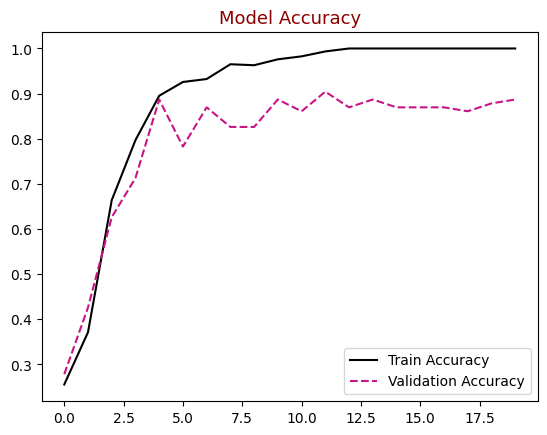

In [8]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train Accuracy",color="black")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Accuracy",color="darkred",size=13)
plt.legend()
plt.show()


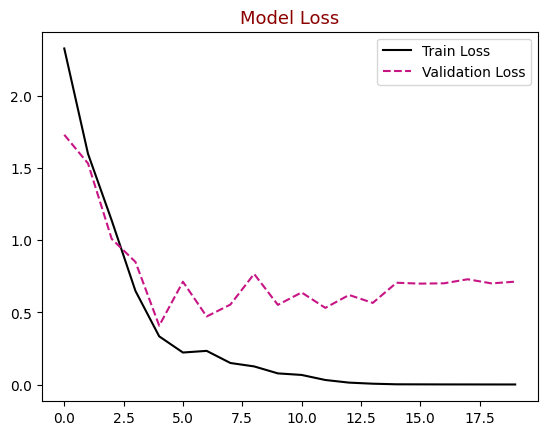

In [9]:
plt.figure()
plt.plot(history.history["loss"],label="Train Loss",color="black")
plt.plot(history.history["val_loss"],label="Validation Loss",color="mediumvioletred",linestyle="dashed",markeredgecolor="purple",markeredgewidth=2)
plt.title("Model Loss",color="darkred",size=13)
plt.legend()
plt.show()

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,509,204 (127.83 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,339,470 (85.22 MB)

In [11]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Save the trained model
model.save("image_classifier_model.h5")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8985 - loss: 0.6330


Test Loss: 0.7132365107536316
Test Accuracy: 0.886956512928009


In [12]:
# Load the trained model
from keras.models import load_model
model = load_model("image_classifier_model.h5")

In [13]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for batch size
    return img

In [52]:
# Path to the input image you want to predict
input_image_path = "archive/Passport/30.jpg"

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions on the input image
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Class: Passport


In [16]:
!pip install pytesseract
import pytesseract
!apt-get install tesseract-ocr
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [53]:
img = cv2.imread(input_image_path)


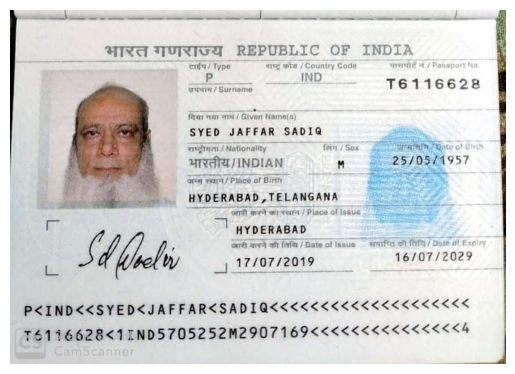

In [54]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib.pyplot
plt.imshow(image_rgb)
plt.axis('off')  # Remove axis ticks and labels
plt.show()

In [55]:
text = pytesseract.image_to_string(img)


In [56]:
text

'_HIRA WRIGaA REPUBLIC OF INDIA\n\n~ enka /Type arg aie / Country Code urerité 4./ Pass\n\nP IND\n\neare/Gurhens : T6116628\nfear wan Hri/ Given Name(s)\n\nSYED JAFFAR SADIQ\naegigea i Nalicnaltyy CT Sex\nUTA INDIAN "\nwaeriraaatinn =\nHYDERABAD ,TELANGANA\nEE ieee F\n\n"| HYDERABAD =\nLG, j,. ad eh a ral ania waa aA THAT Daie ot iy\nah nariarieowe 2. ter0T 2029\n\nP<IND<<SYED<JAFFAR<SADIQK<<<<<<<<<K <<< KKK <<<\n151916628<1IND5705252M2907 169<<<<<< 55555 << KK\n\n'

In [38]:
import re

def extract_information(text):
    # Extract License Number (assumes pattern like XX00/000000/00)
    license_number = re.search(r'\b[A-Z]{2}\d{2}/\d{6}/\d{2}\b', text)
    if license_number:
        print("License Number:", license_number.group())

    # Extract any dates in the format dd/mm/yyyy or dd/mm/yy
    dates = re.findall(r'\b\d{2}/\d{2}/\d{2,4}\b', text)
    if dates:
        print("Dates found:", dates)
    
    # Extract Name (Assumes it's all-uppercase or follows the word "Name")
    name = re.search(r'(Name|NAME)\s*([A-Z]+\s[A-Z]+)', text)
    if name:
        print("Name:", name.group(2))

    # Extract Address (Assumes it follows the word "Address" and spans multiple lines)
    address = re.search(r'(Address|ADDRESS)\s*(.+)', text, re.DOTALL)
    if address:
        # Clean up the address by replacing newlines with commas
        clean_address = address.group(2).replace('\n', ', ').strip()
        print("Address:", clean_address)

    # Extract Date of Birth (DOB) assuming "DB" or "D.O.B." precedes it
    dob = re.search(r'(DB|D.O.B.)\s*(\d{2}/\d{2}/\d{2,4})', text)
    if dob:
        print("Date of Birth:", dob.group(2))

    # Extract License Validity (Assumes the last date is the validity date)
    if dates:
        print("License Validity Date:", dates[-1])

# Call the function with the text
extract_information(text)


License Number: GJ12/001870/00
Dates found: ['28/03/2000', '15/09/42', '10/03/2020']
Name: DARJI SURESH
Address: NR, MADR, ANZIL, CAMP Jr i4GAR, BHU, -: 6004, DB 15/09/42:, is licenced to driver, Valid for other than Transport Vehicles, Expiry Date: 10/03/2020,
Date of Birth: 15/09/42
License Validity Date: 10/03/2020


In [57]:
import re

def extract_passport_information(text):
    # Extract Passport Number (assumes a pattern of uppercase letters followed by digits)
    passport_number = re.search(r'\b[A-Z]\d{7,9}\b', text)
    if passport_number:
        print("Passport Number:", passport_number.group())

    # Extract Name (assumes it follows the pattern <<Name<<Surname)
    name = re.search(r'P<([A-Z]+)<<([A-Z]+)', text)
    if name:
        print("Name:", name.group(2), name.group(1))

    # Extract Nationality (Assumes the word 'Nationality' precedes it)
    nationality = re.search(r'Nationality\s*(\w+)', text)
    if nationality:
        print("Nationality:", nationality.group(1))

    # Extract Sex (M/F indicator after the word 'Sex')
    sex = re.search(r'Sex\s*(M|F)', text)
    if sex:
        print("Sex:", sex.group(1))

    # Extract Date of Birth (Assumes a date format dd/mm/yyyy after the keyword 'Date of Birth')
    dob = re.search(r'Date of Birth\s*(\d{2}/\d{2}/\d{4})', text)
    if dob:
        print("Date of Birth:", dob.group(1))

    # Extract Date of Issue
    issue_date = re.search(r'Date of issue\s*(\d{2}/\d{2}/\d{4})', text)
    if issue_date:
        print("Date of Issue:", issue_date.group(1))

    # Extract Date of Expiry
    expiry_date = re.search(r'Date of Expiry\s*(\d{2}/\d{2}/\d{4})', text)
    if expiry_date:
        print("Date of Expiry:", expiry_date.group(1))

# Call the function with the sample text
extract_passport_information(text)


Passport Number: T6116628
Name: SYED IND
